
This script is for calibrating camera.
1. Specify the path of images.
2. Specify the size of chessboard.
3. Specify the output file name.



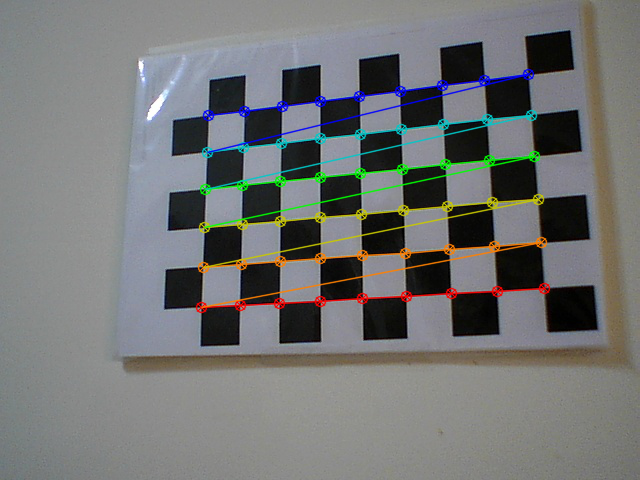

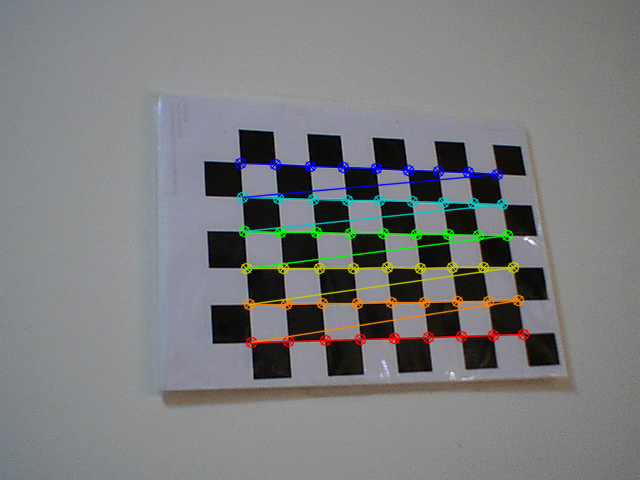

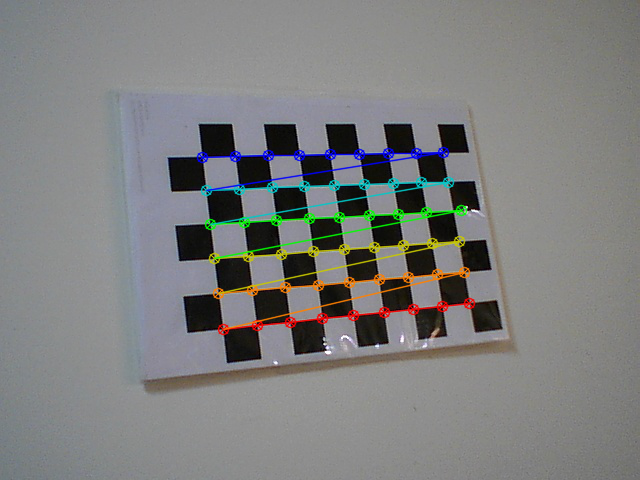

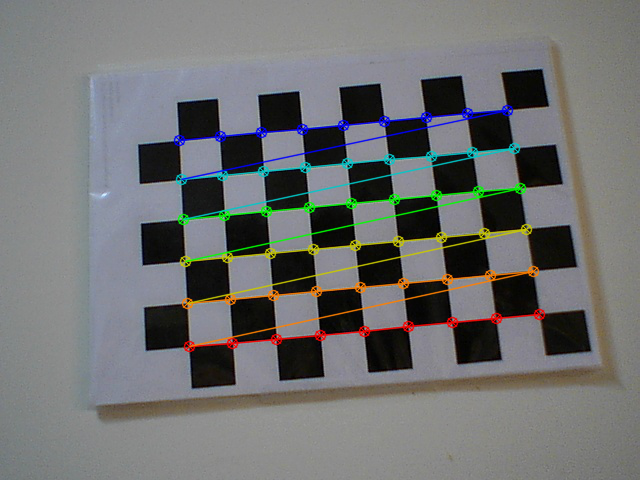

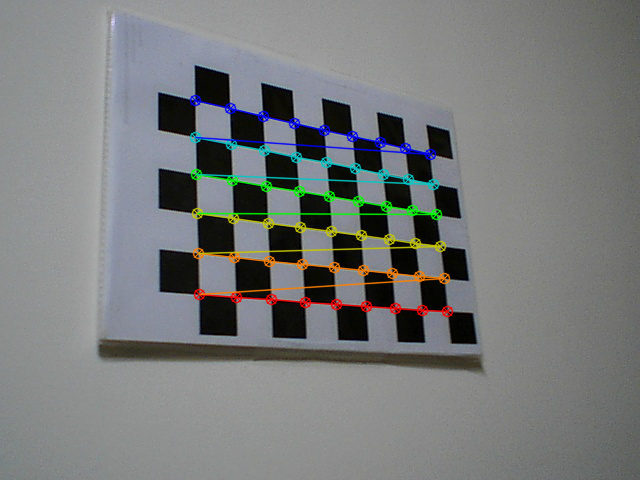

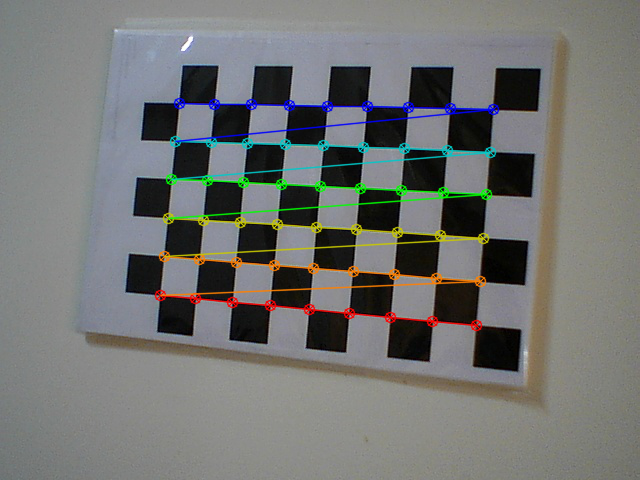

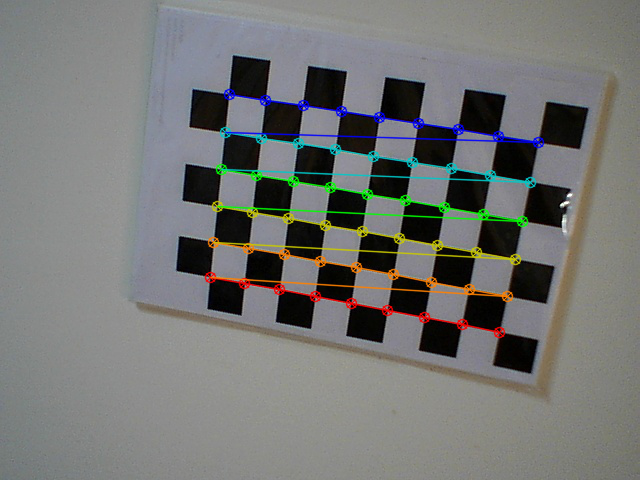

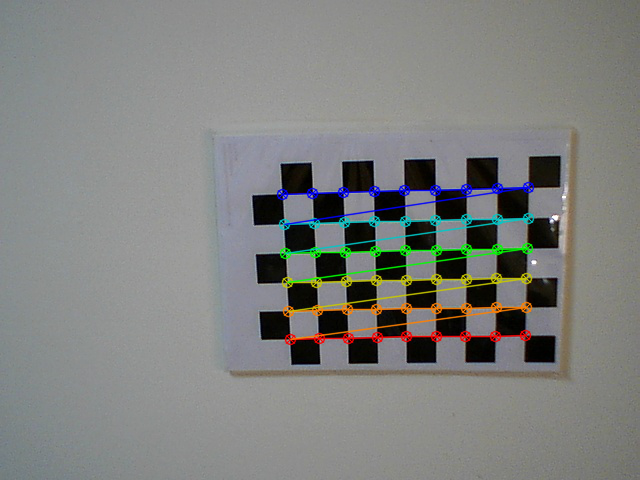

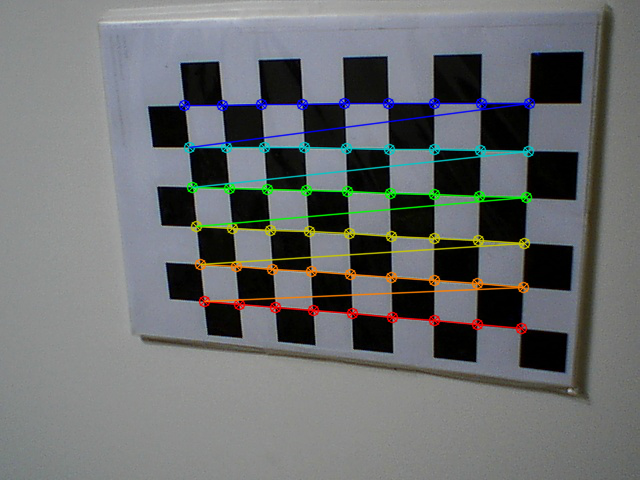

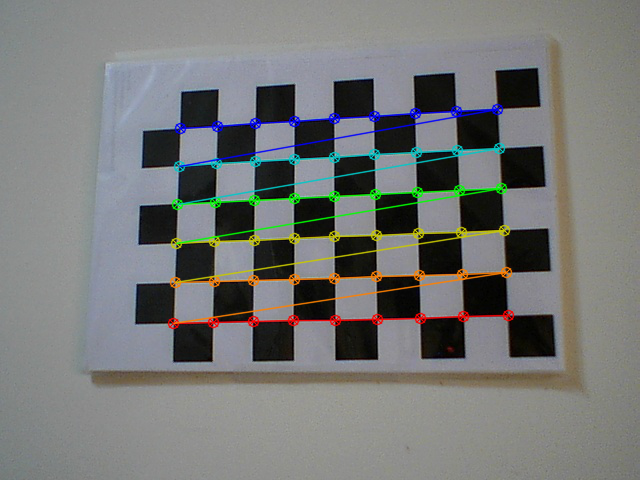

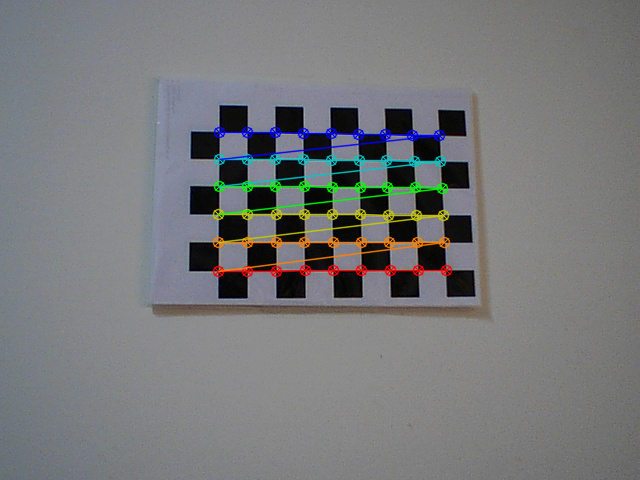

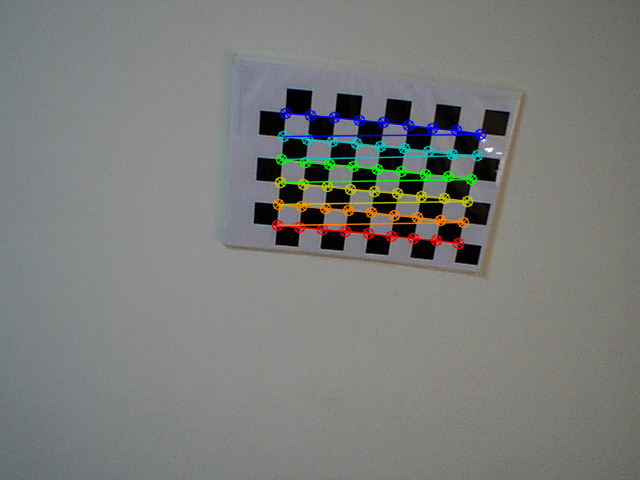

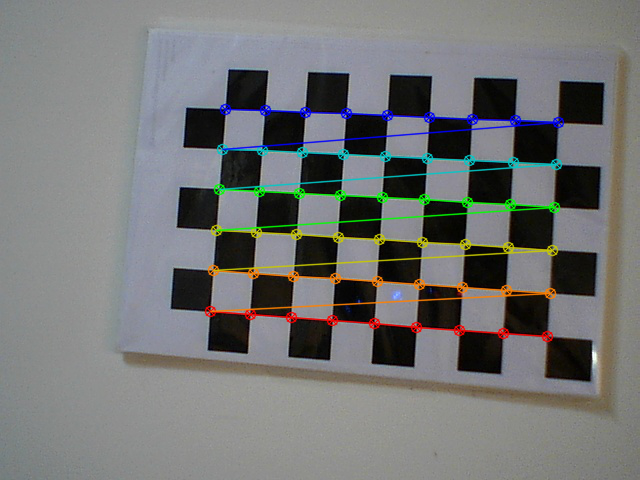

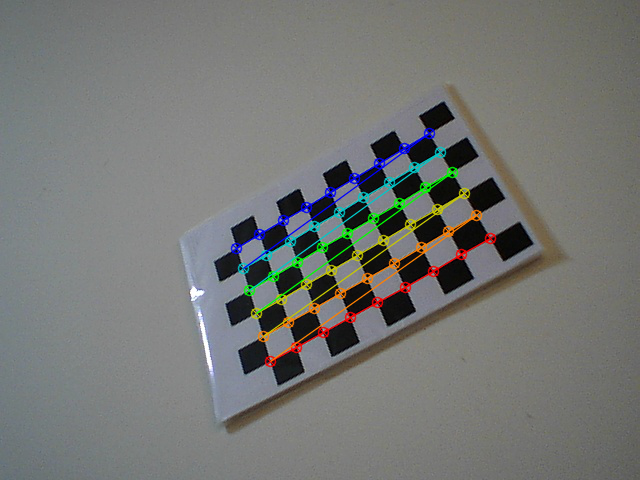

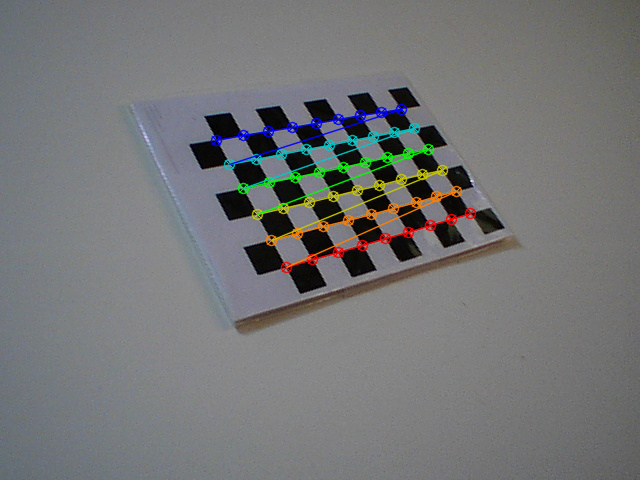

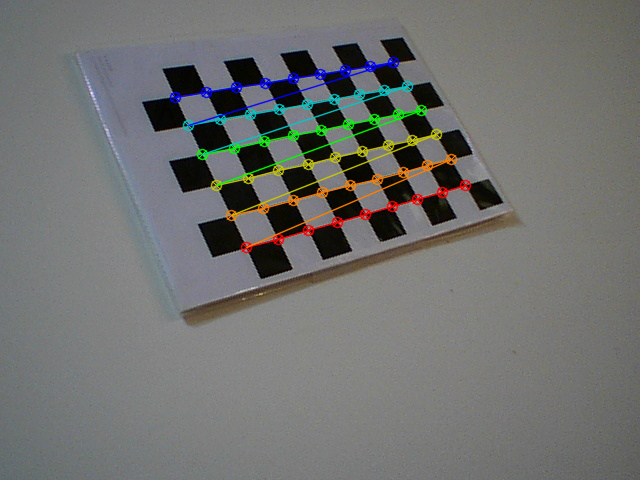

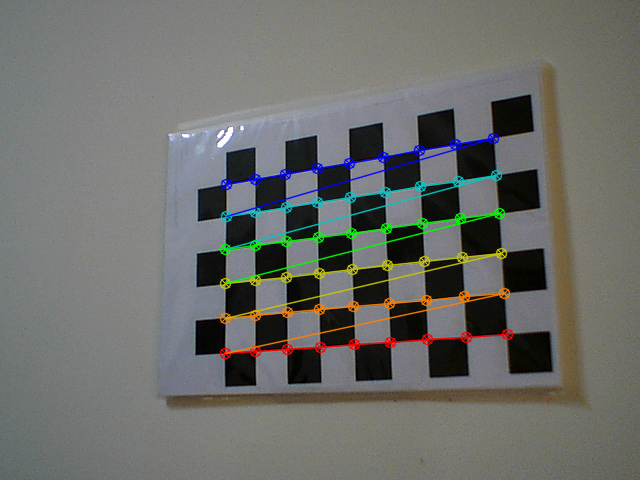

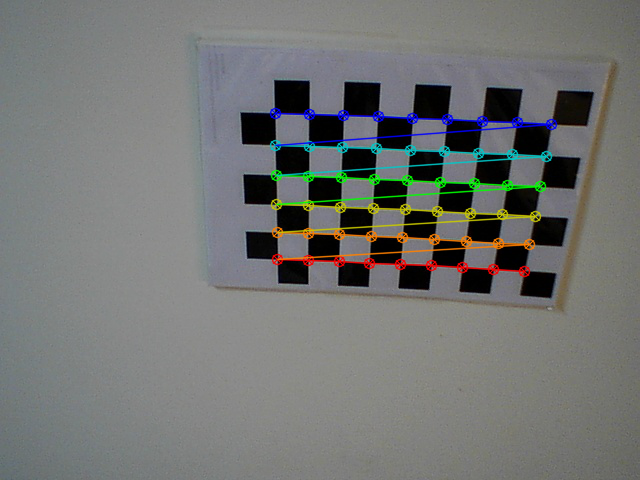

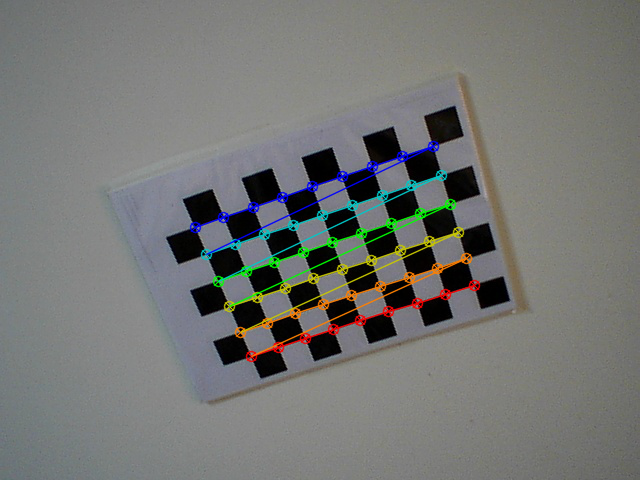

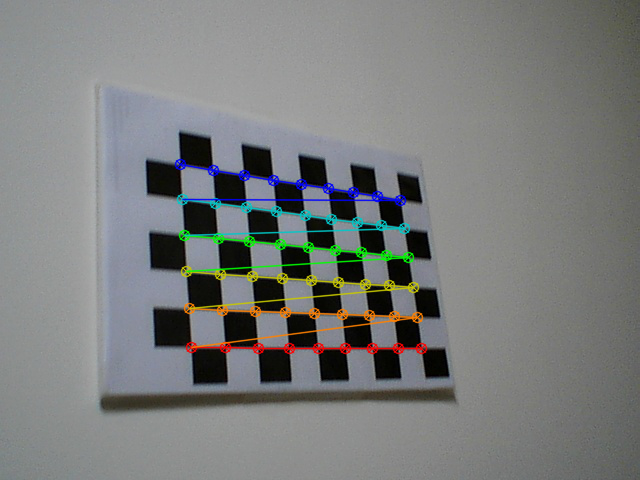

Calibrando...
Matriz de la cámara 
 [[760.64646495   0.         322.20852569]
 [  0.         763.50062517 266.47250043]
 [  0.           0.           1.        ]] 
 Coeficientes de distorsión coefficients : 
 [[-7.14844822e-02 -2.46190300e-01  2.95164007e-03  1.02654376e-03
   1.74014854e+00]]
total error: 0.04070178719102162


In [ ]:

import numpy as np
import cv2 as cv
import glob
import yaml
from pathlib import Path
from skimage import io
from google.colab.patches import cv2_imshow # para visualizar imágenes
CHESSBOARD_CORNER_NUM_X = 9
CHESSBOARD_CORNER_NUM_Y = 6
IMAGE_SRC = "cam1_images"
CAMERA_PARAMETERS_OUTPUT_FILE = "cam1.yaml"

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(8,5,0)
objp = np.zeros((CHESSBOARD_CORNER_NUM_X*CHESSBOARD_CORNER_NUM_Y,3), np.float32)
objp[:,:2] = np.mgrid[0:CHESSBOARD_CORNER_NUM_X,0:CHESSBOARD_CORNER_NUM_Y].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = ['https://github.com/EveryWhereLab/camera-calibration-using-opencv-python/blob/main/cam1_images/0.jpg?raw=true',
          'https://github.com/EveryWhereLab/camera-calibration-using-opencv-python/blob/main/cam1_images/1.jpg?raw=true',
          'https://github.com/EveryWhereLab/camera-calibration-using-opencv-python/blob/main/cam1_images/2.jpg?raw=true',
          'https://github.com/EveryWhereLab/camera-calibration-using-opencv-python/blob/main/cam1_images/3.jpg?raw=true',
          'https://github.com/EveryWhereLab/camera-calibration-using-opencv-python/blob/main/cam1_images/4.jpg?raw=true',
          'https://github.com/EveryWhereLab/camera-calibration-using-opencv-python/blob/main/cam1_images/5.jpg?raw=true',
          'https://github.com/EveryWhereLab/camera-calibration-using-opencv-python/blob/main/cam1_images/6.jpg?raw=true',
          'https://github.com/EveryWhereLab/camera-calibration-using-opencv-python/blob/main/cam1_images/7.jpg?raw=true',
          'https://github.com/EveryWhereLab/camera-calibration-using-opencv-python/blob/main/cam1_images/8.jpg?raw=true',
          'https://github.com/EveryWhereLab/camera-calibration-using-opencv-python/blob/main/cam1_images/9.jpg?raw=true',
          'https://github.com/EveryWhereLab/camera-calibration-using-opencv-python/blob/main/cam1_images/10.jpg?raw=true',
          'https://github.com/EveryWhereLab/camera-calibration-using-opencv-python/blob/main/cam1_images/11.jpg?raw=true',
          'https://github.com/EveryWhereLab/camera-calibration-using-opencv-python/blob/main/cam1_images/12.jpg?raw=true',
          'https://github.com/EveryWhereLab/camera-calibration-using-opencv-python/blob/main/cam1_images/13.jpg?raw=true',
          'https://github.com/EveryWhereLab/camera-calibration-using-opencv-python/blob/main/cam1_images/14.jpg?raw=true',
          'https://github.com/EveryWhereLab/camera-calibration-using-opencv-python/blob/main/cam1_images/15.jpg?raw=true',
          'https://github.com/EveryWhereLab/camera-calibration-using-opencv-python/blob/main/cam1_images/16.jpg?raw=true',
          'https://github.com/EveryWhereLab/camera-calibration-using-opencv-python/blob/main/cam1_images/17.jpg?raw=true',
          'https://github.com/EveryWhereLab/camera-calibration-using-opencv-python/blob/main/cam1_images/18.jpg?raw=true',
          'https://github.com/EveryWhereLab/camera-calibration-using-opencv-python/blob/main/cam1_images/19.jpg?raw=true'
          
          ]
for fname in images:
    img = cv.cvtColor(io.imread(fname), cv.COLOR_BGR2RGB) # lee imagen en formato RGB
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (CHESSBOARD_CORNER_NUM_X,CHESSBOARD_CORNER_NUM_Y), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (CHESSBOARD_CORNER_NUM_X,CHESSBOARD_CORNER_NUM_Y), corners2, ret)
        cv2_imshow(img)
        # cv.waitKey(500)
    else:
        print('Failed to find a chessboard in {}'.format(fname))
cv.destroyAllWindows()
print ("Calibrando...")
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
print("Matriz de la cámara \n", mtx, "\n Coeficientes de distorsión coefficients : \n", dist)
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv.norm(imgpoints[i], imgpoints2, cv.NORM_L2)/len(imgpoints2)
    mean_error += error
print( "total error: {}".format(mean_error/len(objpoints)) )
data = {'camera_matrix': np.asarray(mtx).tolist(), 'dist_coeff': np.asarray(dist).tolist()}
with open(CAMERA_PARAMETERS_OUTPUT_FILE, "w") as f:
    yaml.dump(data, f)

In [ ]:
gray.shape

(480, 640)